In [418]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from scipy.stats import norm, skew


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)


## DATA INSPECTION

In [419]:
hd = pd.read_csv(r"C:\Users\LENOVO\Downloads\train.csv")
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [420]:
hd.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [421]:
hd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [422]:
hd.shape


(1460, 81)

In [423]:
hd.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

## DATA CLEANING

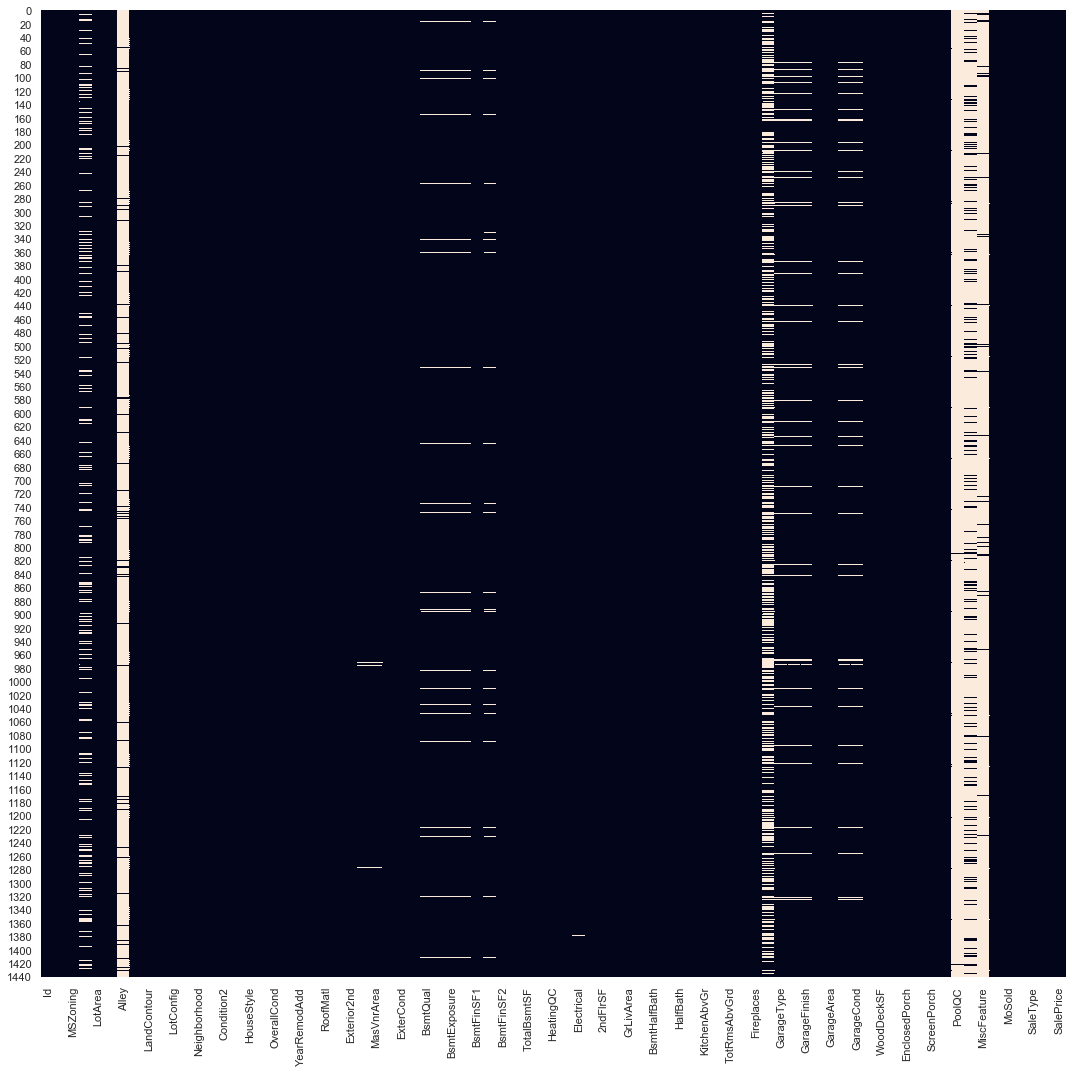

In [424]:
#GETIING A VISUALIZATION FOR NULL VALUES IN DATA SET 
plt.figure(figsize=(15,15))
sns.heatmap(hd.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [425]:
hd.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [426]:
total = pd.DataFrame(hd.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(hd.isnull().sum()/hd.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


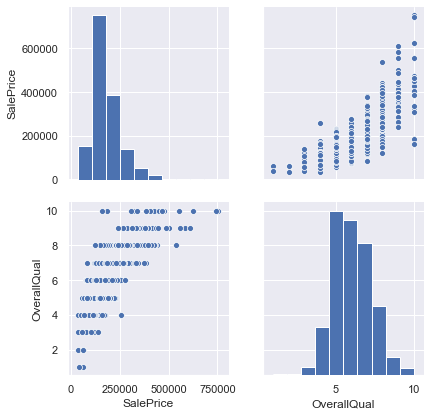

In [427]:
#relationships between varibles
sns.set()
cols = ['SalePrice', 'OverallQual']
sns.pairplot(hd[cols], size = 3)
plt.show();

In [428]:
for i in l:
    print(i)
    print("Skewness: %f" % hd[i].skew())
    print("Kurtosis: %f" % hd[i].kurt())
    print(" ")
    print(" ")

-0.0007206601945803023


KeyError: -0.0007206601945803023

In [429]:
print("Skewness: %f" % hd['SalePrice'].skew())
print("Kurtosis: %f" % hd['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


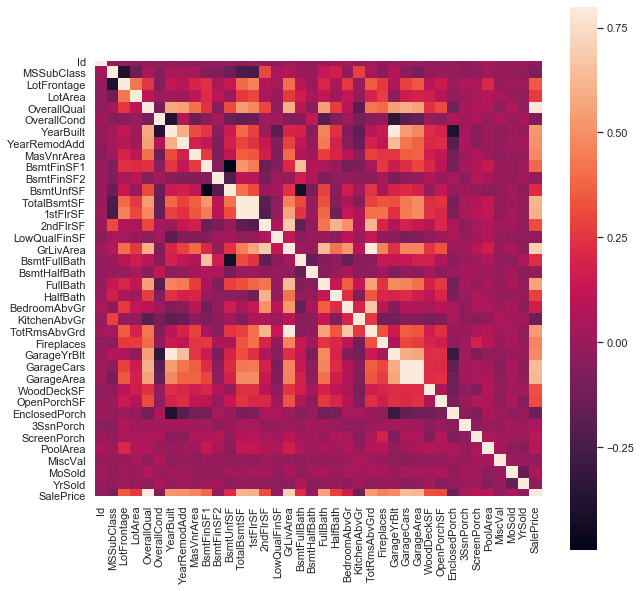

In [430]:
#correlation matrix
corrmat = hd.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

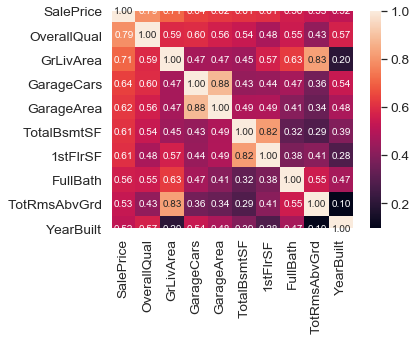

In [431]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(hd[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## DATA PREPARATION:

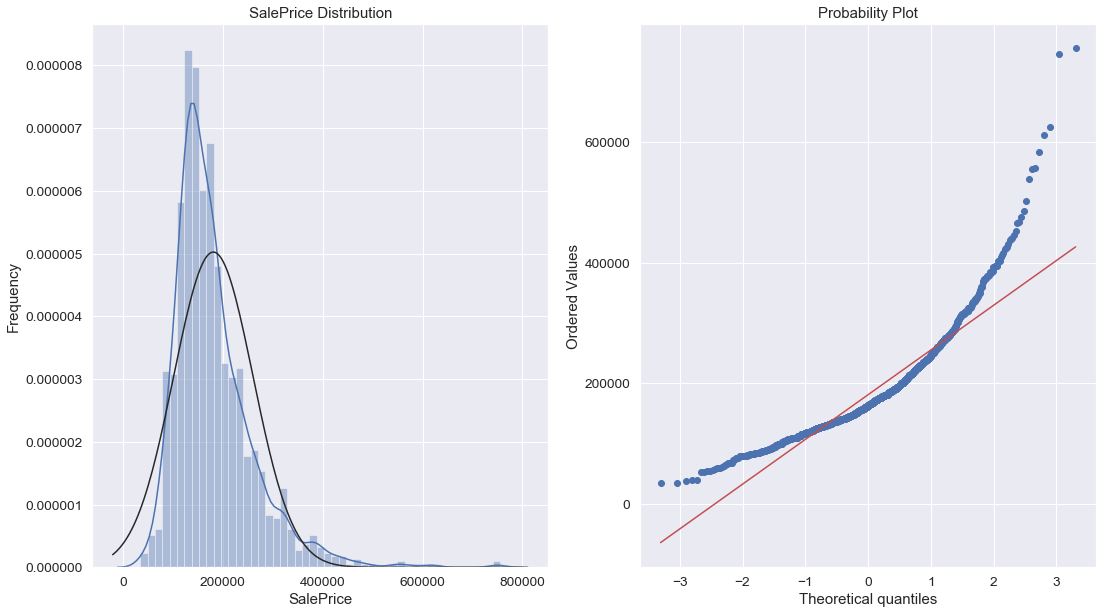

In [432]:
figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(hd['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(hd['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
stats.probplot(hd['SalePrice'], plot=plt)
plt.show()

ValueError: num must be 1 <= num <= 36, not 37

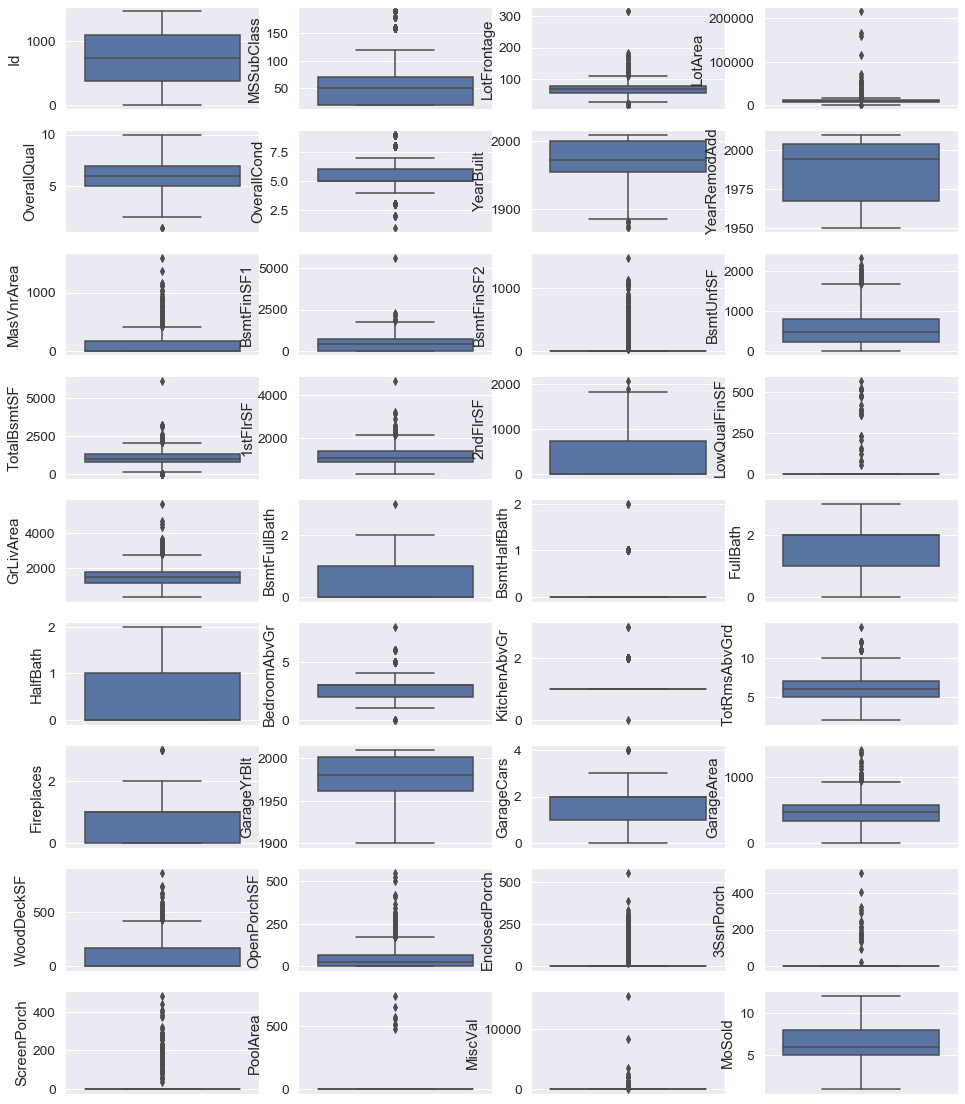

In [433]:
numerical_features = hd.select_dtypes(exclude='object').drop(['SalePrice'], axis=1)
fig = plt.figure(figsize=(16,20))

for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [434]:
y=hd.loc[:, hd.dtypes == np.int64]

In [435]:
l=(list(y.columns))

In [436]:
l

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [437]:
for i in l:
    print(i)
    print("Skewness: %f" % hd[i].skew())
    print("Kurtosis: %f" % hd[i].kurt())
    print(" ")
    print(" ")

Id
Skewness: 0.000000
Kurtosis: -1.200000
 
 
MSSubClass
Skewness: 1.407657
Kurtosis: 1.580188
 
 
LotArea
Skewness: 12.207688
Kurtosis: 203.243271
 
 
OverallQual
Skewness: 0.216944
Kurtosis: 0.096293
 
 
OverallCond
Skewness: 0.693067
Kurtosis: 1.106413
 
 
YearBuilt
Skewness: -0.613461
Kurtosis: -0.439552
 
 
YearRemodAdd
Skewness: -0.503562
Kurtosis: -1.272245
 
 
BsmtFinSF1
Skewness: 1.685503
Kurtosis: 11.118236
 
 
BsmtFinSF2
Skewness: 4.255261
Kurtosis: 20.113338
 
 
BsmtUnfSF
Skewness: 0.920268
Kurtosis: 0.474994
 
 
TotalBsmtSF
Skewness: 1.524255
Kurtosis: 13.250483
 
 
1stFlrSF
Skewness: 1.376757
Kurtosis: 5.745841
 
 
2ndFlrSF
Skewness: 0.813030
Kurtosis: -0.553464
 
 
LowQualFinSF
Skewness: 9.011341
Kurtosis: 83.234817
 
 
GrLivArea
Skewness: 1.366560
Kurtosis: 4.895121
 
 
BsmtFullBath
Skewness: 0.596067
Kurtosis: -0.839098
 
 
BsmtHalfBath
Skewness: 4.103403
Kurtosis: 16.396642
 
 
FullBath
Skewness: 0.036562
Kurtosis: -0.857043
 
 
HalfBath
Skewness: 0.675897
Kurtosis: -

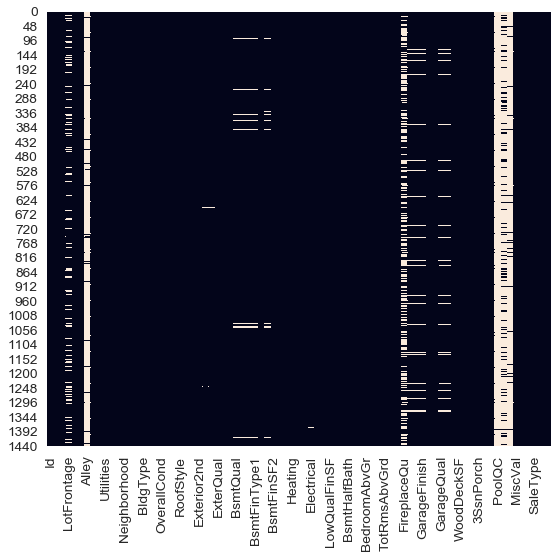

In [438]:
plt.figure(figsize=(8,8))
sns.heatmap(hd.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [439]:
#from the above graph we can get the idea of getting null values in the various columns
#lets deal with the null values 

Text(0.5, 1.0, 'Percentage Missing')

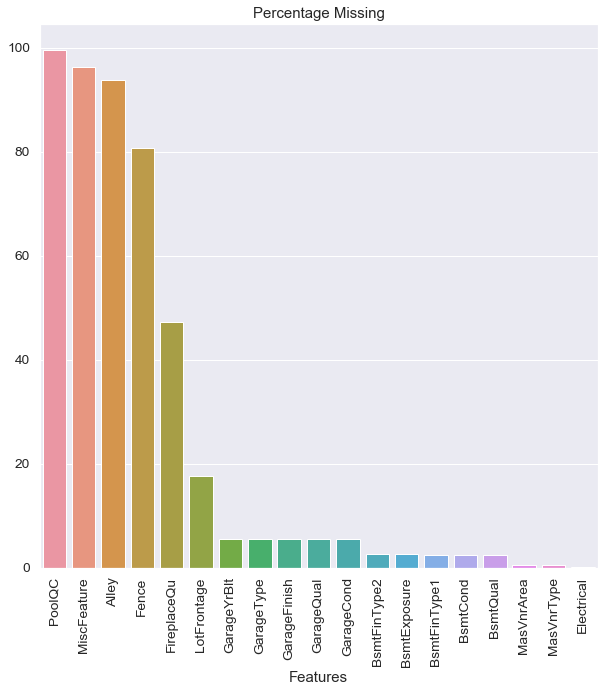

In [440]:
na = (hd.isnull().sum() / len(hd)) * 100
na = na.drop(na[na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=na.index, y=na)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.title('Percentage Missing', fontsize=15)

In [441]:
#imputing some feature by creating a different category nill

In [442]:
for col in ('FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC', 'MSSubClass'):
    hd[col] = hd[col].fillna('nill')

In [443]:
#some values are needed to be replaced with their mode

In [444]:
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'MSZoning', 'SaleType', 'Utilities'):
    hd[col] = hd[col].fillna(hd[col].mode()[0])

In [445]:
total = pd.DataFrame(hd.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(hd.isnull().sum()/hd.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtCond,37,2.53


In [446]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    hd[col] = hd[col].fillna(0)
    
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    hd[col] = hd[col].fillna('None')
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    hd[col] = hd[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    hd[col] = hd[col].fillna('None')    

In [447]:
total = pd.DataFrame(hd.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(hd.isnull().sum()/hd.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
LotFrontage,259,17.74
MasVnrType,8,0.55
MasVnrArea,8,0.55
SalePrice,0,0.00
Foundation,0,0.00
RoofMatl,0,0.00
Exterior1st,0,0.00
Exterior2nd,0,0.00
ExterQual,0,0.00
ExterCond,0,0.00


In [570]:
hd['MasVnrType'] = hd['MasVnrType'].fillna('nill')
hd['MasVnrArea'] = hd['MasVnrArea'].fillna(0)
# LotFrontage is correlated to the 'Neighborhood' feature because the LotFrontage for nearby houses will be really similar, so we fill in missing values by the median based off of Neighborhood
hd["LotFrontage"] = hd.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

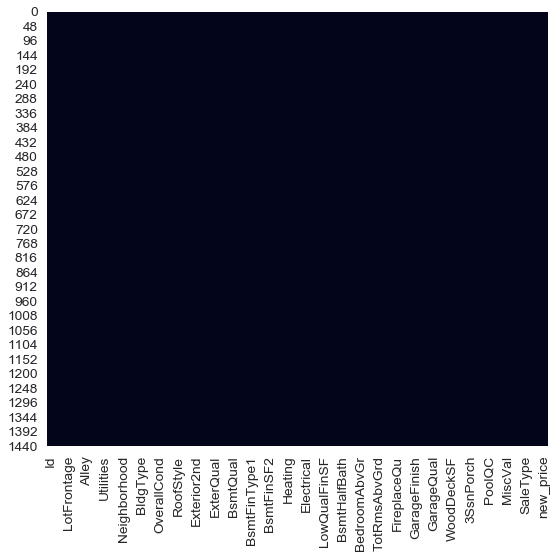

In [571]:
plt.figure(figsize=(8,8))
sns.heatmap(hd.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [450]:
total = pd.DataFrame(hd.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(hd.isnull().sum()/hd.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


In [451]:
dtypes_t = hd.dtypes #type of each feature in data: int, float, object
numbers = dtypes_t[(dtypes_t == 'int64') | (dtypes_t == float)] #numerical values are either type int or float
categories = dtypes_t[dtypes_t == object] #categorical values are type object

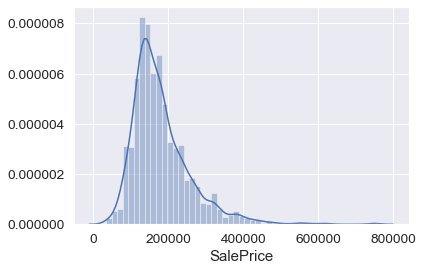

In [452]:
sns.distplot(hd["SalePrice"])

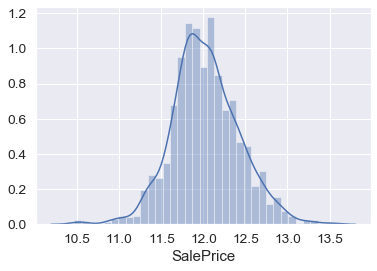

In [453]:
sns.distplot(np.log(hd["SalePrice"]))

In [454]:
#log value of sale price has a better distribution


In [455]:
hd["new_price"] = np.log(hd["SalePrice"])

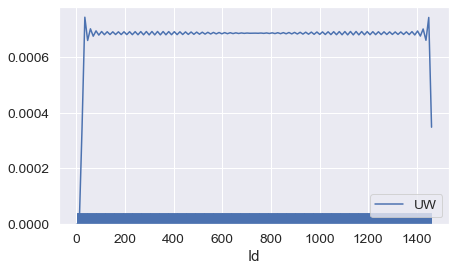

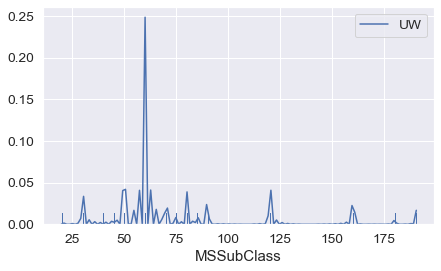

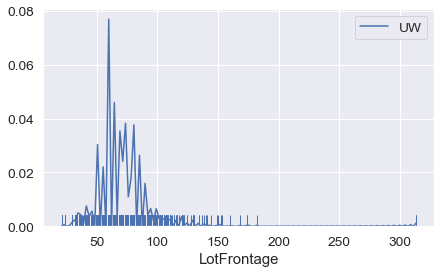

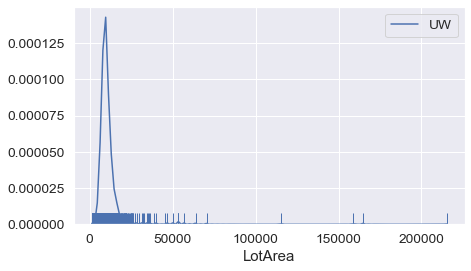

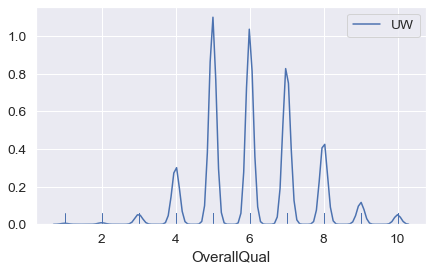

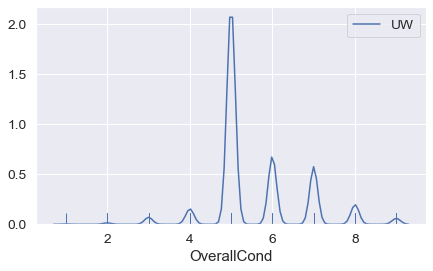

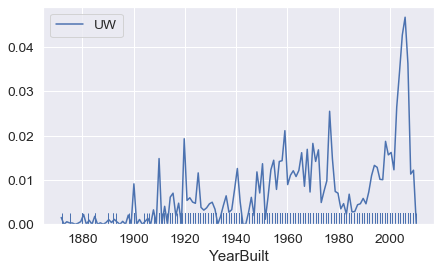

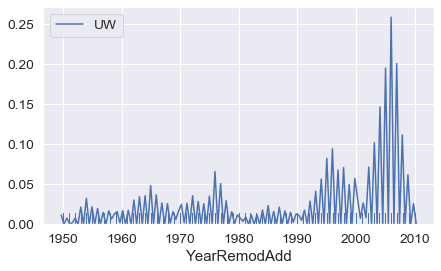

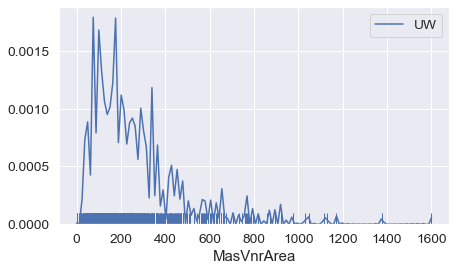

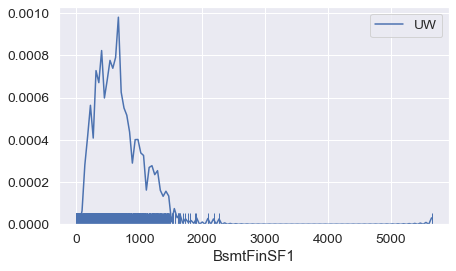

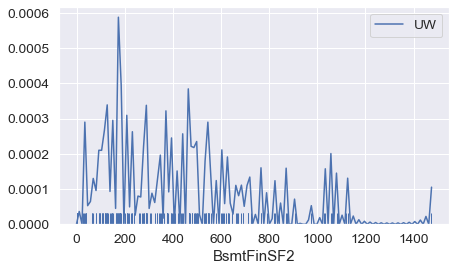

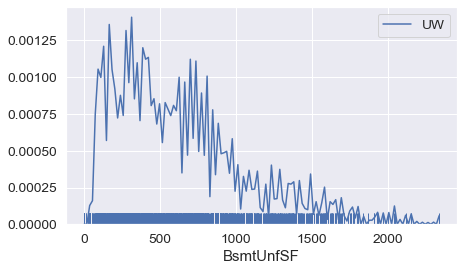

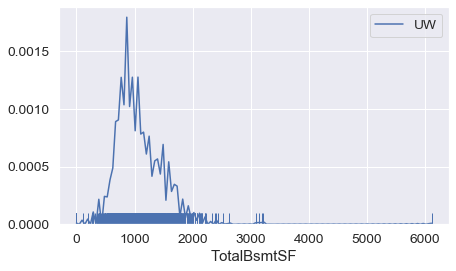

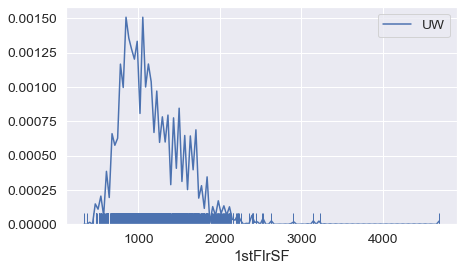

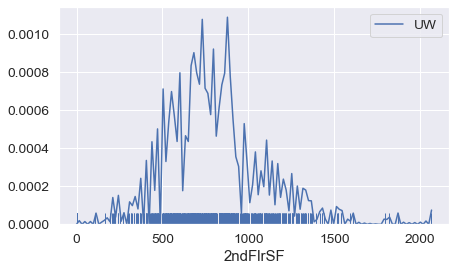

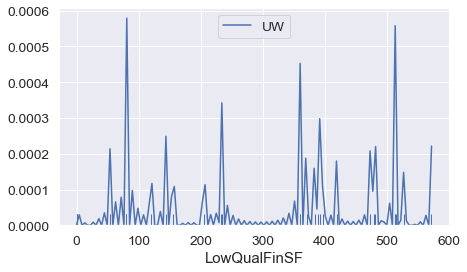

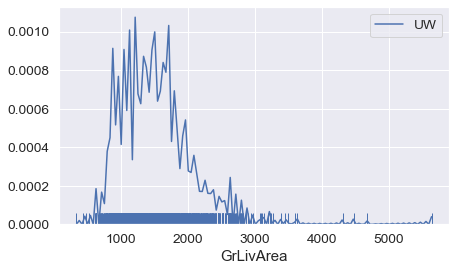

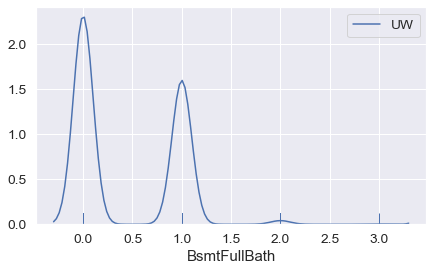

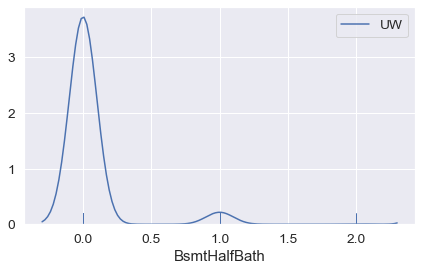

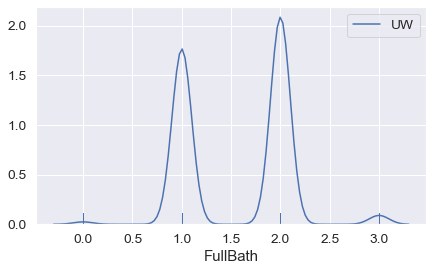

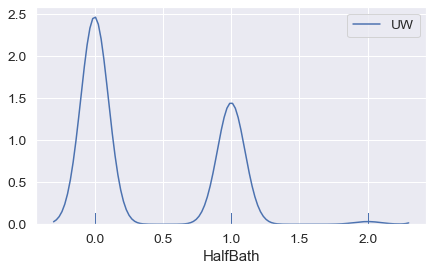

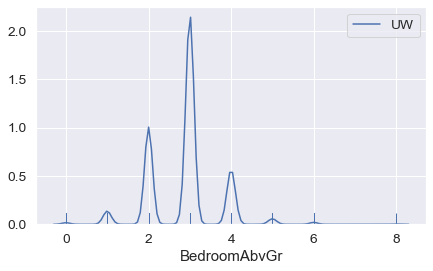

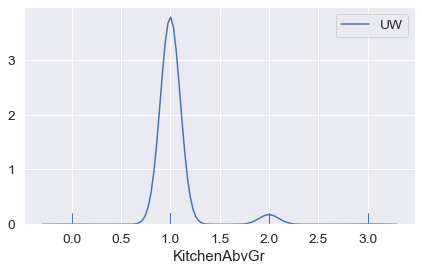

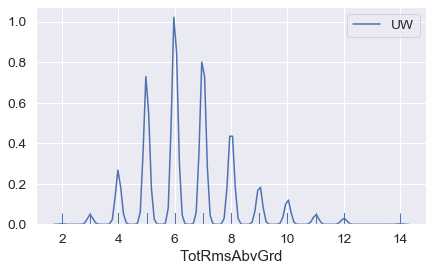

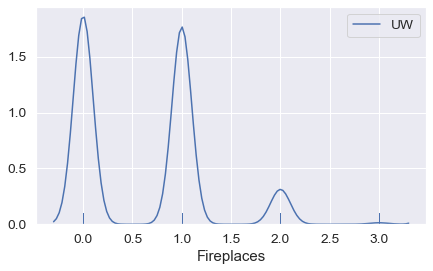

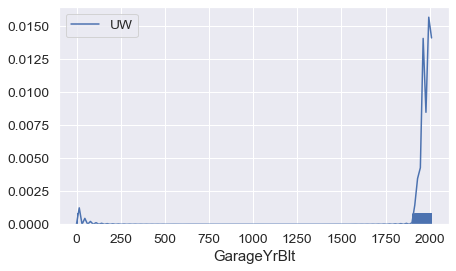

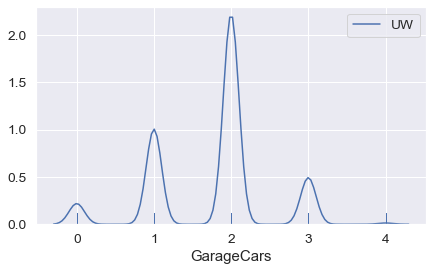

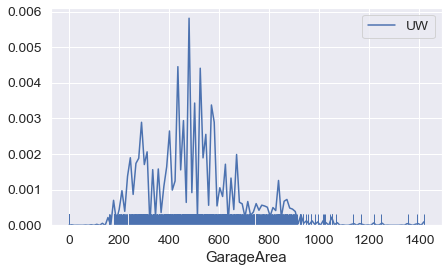

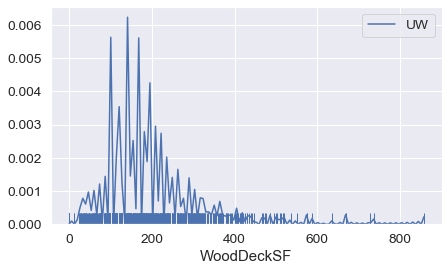

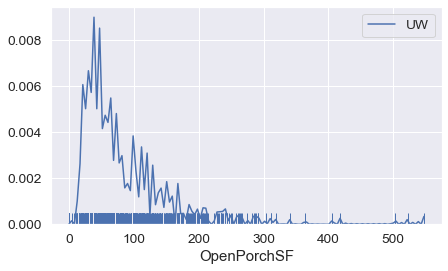

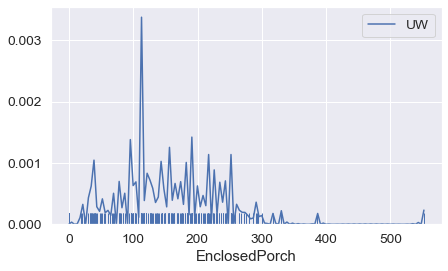

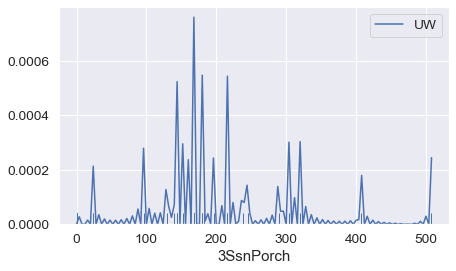

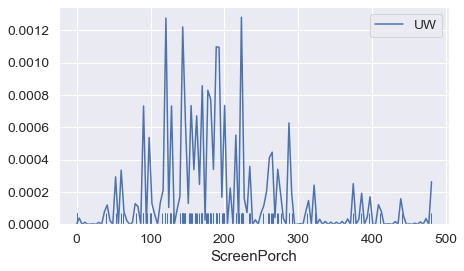

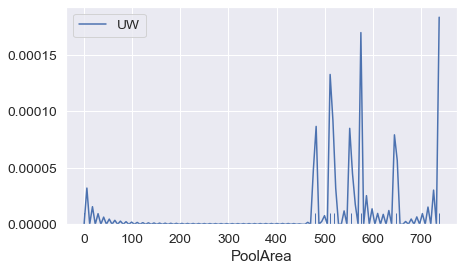

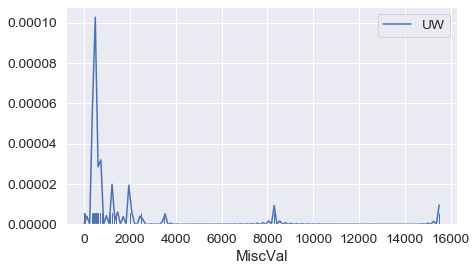

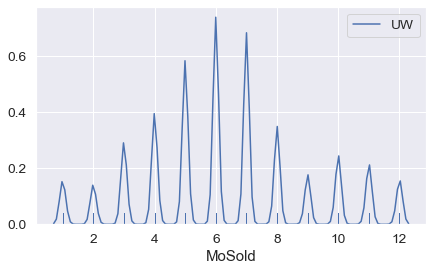

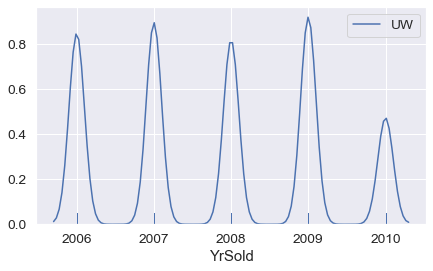

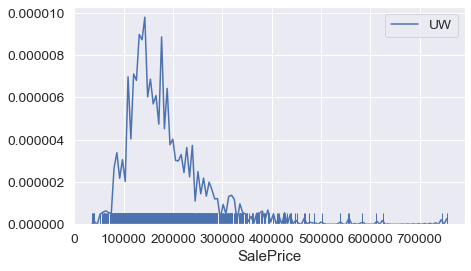

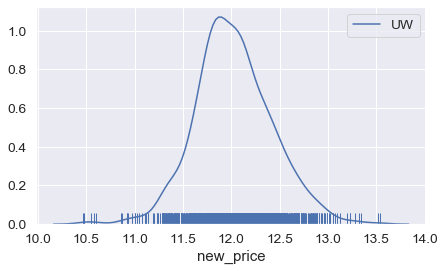

In [456]:
numerical_dataset = hd.select_dtypes(exclude='object')

for i in range(len(numerical_dataset.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.distplot(numerical_dataset.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_dataset.columns[i])

In [457]:
#seperatind datatypes for simpler analysis:

In [458]:
dtype = hd.dtypes 
num = dtype[(dtype == 'int64') | (dtype == float)] #numerical values
cat = dtype[dtype == object] #categorical values

In [459]:
pd.DataFrame(dtype).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     4
Name: 0, dtype: int64

In [460]:
#we should convert num_train to a list to make it easier to work with
numt = list(num.index)

In [461]:
catt = list(cat.index)
print(catt)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [462]:
for i in catt:
    feature_set = set(hd[i])
    for j in feature_set:
        feature_list = list(feature_set)
        hd.loc[hd[i] == j, i] = feature_list.index(j)

In [463]:
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_price
0,1,60,1,65.0,8450,1,2,1,1,1,4,0,8,1,1,4,7,7,5,2003,2003,2,1,7,6,3,196.0,1,4,1,0,4,3,0,706,4,0,150,856,0,2,1,0,856,854,0,1710,1,0,2,1,3,1,1,8,6,0,5,6,2003.0,3,2,548,5,5,2,0,61,0,0,0,0,3,1,4,0,2,2008,7,5,208500,12.247694
1,2,20,1,80.0,9600,1,2,1,1,1,0,0,18,8,1,4,0,6,8,1976,1976,2,1,13,14,0,0.0,2,4,3,0,4,0,2,978,4,0,284,1262,0,2,1,0,1262,0,0,1262,0,1,2,0,3,1,2,6,6,1,4,6,1976.0,3,2,460,5,5,2,298,0,0,0,0,0,3,1,4,0,5,2007,7,5,181500,12.109011
2,3,60,1,68.0,11250,1,2,0,1,1,4,0,8,1,1,4,7,7,5,2001,2002,2,1,7,6,3,162.0,1,4,1,0,4,1,0,486,4,0,434,920,0,2,1,0,920,866,0,1786,1,0,2,1,3,1,1,6,6,1,4,6,2001.0,3,2,608,5,5,2,0,42,0,0,0,0,3,1,4,0,9,2008,7,5,223500,12.317167
3,4,70,1,60.0,9550,1,2,0,1,1,3,0,2,1,1,4,7,7,5,1915,1970,2,1,2,5,0,0.0,2,4,0,4,0,3,2,216,4,0,540,756,0,0,1,0,961,756,0,1717,1,0,1,0,3,1,1,7,6,1,0,0,1998.0,0,3,642,5,5,2,0,35,272,0,0,0,3,1,4,0,2,2006,7,0,140000,11.849398
4,5,60,1,84.0,14260,1,2,0,1,1,0,0,12,1,1,4,7,8,5,2000,2000,2,1,7,6,3,350.0,1,4,1,0,4,2,0,655,4,0,490,1145,0,2,1,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,6,1,4,6,2000.0,3,3,836,5,5,2,192,84,0,0,0,0,3,1,4,0,12,2008,7,5,250000,12.429216


## MODEL BUILDING

In [464]:
X = hd.drop(["Id", "SalePrice", "new_price"], axis=1).values
y = hd["new_price"].values

In [465]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [509]:
# alphas for tuning
params = {'alpha': [ 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,10.0, 20, 50, 100, 500 ]}

In [510]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 10.0, 20, 50, 100,
                                   500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [511]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006784,0.003809,0.000596,0.000487,0.001,{'alpha': 0.001},-0.097997,-0.105521,-0.106473,-0.089358,-0.096277,-0.099124,0.006317,2,-0.087935,-0.083079,-0.085958,-0.093039,-0.092224,-0.088447,0.003758
1,0.002394,0.000490,0.000598,0.000488,0.01,{'alpha': 0.01},-0.095594,-0.105153,-0.106461,-0.088810,-0.092572,-0.097716,0.006955,1,-0.095069,-0.085038,-0.089615,-0.096363,-0.095064,-0.092230,0.004283
2,0.018949,0.006881,0.000000,0.000000,0.05,{'alpha': 0.05},-0.102778,-0.119275,-0.118183,-0.103406,-0.101202,-0.108963,0.008008,3,-0.106443,-0.099180,-0.103389,-0.106888,-0.106279,-0.104436,0.002904
3,0.014960,0.002601,0.000598,0.000489,0.1,{'alpha': 0.1},-0.110743,-0.127148,-0.126656,-0.113524,-0.110881,-0.117784,0.007507,7,-0.116996,-0.105492,-0.111654,-0.116874,-0.117418,-0.113687,0.004611
4,0.011768,0.002475,0.000000,0.000000,0.2,{'alpha': 0.2},-0.109284,-0.127033,-0.125901,-0.112939,-0.110963,-0.117216,0.007644,5,-0.116639,-0.105572,-0.111285,-0.116523,-0.117278,-0.113460,0.004495


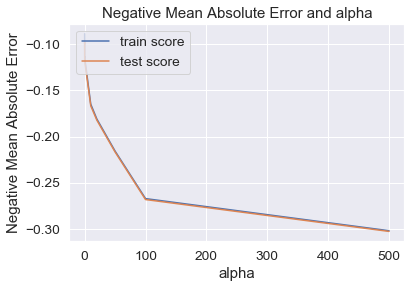

In [512]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [528]:
alpha = 0.02

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [529]:
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [530]:
lasso.score(X_train, y_train)

0.8561427592880432

In [531]:
lasso.coef_

array([-6.72057550e-04,  0.00000000e+00, -2.99417969e-04,  2.07973791e-06,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.19664988e-03,
       -2.31540580e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        6.03097351e-02,  1.75111804e-02,  2.62626723e-03,  2.50830393e-03,
       -0.00000000e+00, -0.00000000e+00,  2.34511886e-03,  0.00000000e+00,
        0.00000000e+00,  5.82486932e-06, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -8.29979604e-03,  7.95897773e-05,  0.00000000e+00,  7.46528839e-05,
        2.96560537e-05,  2.49523336e-05, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.29312675e-04,  2.42727231e-04,
        1.88270971e-04,  3.43786722e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [532]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
y_head=model_cv.predict(X_test)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.1s finished


In [533]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001396,7.974148e-04,0.000399,0.000488,0.001,{'alpha': 0.001},-0.103566,-0.105276,-0.105258,-0.089763,-0.097686,-0.100313,0.005962,4,-0.085600,-0.083254,-0.084936,-0.092903,-0.091467,-0.087632,0.003822
1,0.001197,3.994227e-04,0.000399,0.000489,0.01,{'alpha': 0.01},-0.103543,-0.105279,-0.105279,-0.089780,-0.097676,-0.100314,0.005959,5,-0.085624,-0.083256,-0.084943,-0.092908,-0.091473,-0.087641,0.003821
2,0.000997,4.156970e-07,0.000000,0.000000,0.05,{'alpha': 0.05},-0.103442,-0.105296,-0.105372,-0.089853,-0.097631,-0.100322,0.005945,6,-0.085732,-0.083262,-0.084972,-0.092934,-0.091496,-0.087679,0.003816
3,0.000997,3.234067e-07,0.000000,0.000000,0.1,{'alpha': 0.1},-0.103324,-0.105315,-0.105484,-0.089940,-0.097577,-0.100331,0.005929,7,-0.085892,-0.083268,-0.085007,-0.092966,-0.091530,-0.087733,0.003809
4,0.001396,4.889086e-04,0.000199,0.000399,0.2,{'alpha': 0.2},-0.103138,-0.105352,-0.105700,-0.090109,-0.097475,-0.100358,0.005906,8,-0.086191,-0.083279,-0.085071,-0.093026,-0.091599,-0.087833,0.003800


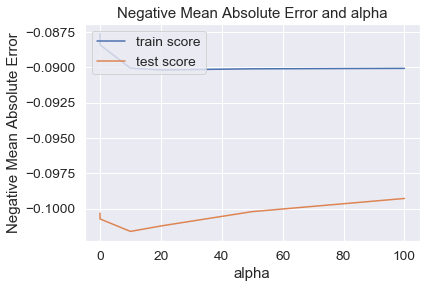

In [534]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [535]:
alpha = 8

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

ridge.coef_

array([-7.20660195e-04,  1.27675902e-02, -1.82127928e-04,  1.60848577e-06,
        4.92192459e-02,  7.83043633e-03, -5.90061799e-03, -3.00200568e-02,
        1.71619795e-02, -3.48613444e-03,  2.07868035e-02, -1.46019323e-03,
       -7.29007350e-03, -5.95232770e-03, -5.52488478e-03, -5.12102949e-03,
        7.14308794e-02,  4.30311591e-02,  1.96834835e-03,  1.15738994e-03,
       -5.91928601e-03, -1.15660316e-02,  5.24033931e-03, -1.26387167e-03,
       -2.29780359e-03,  1.79192026e-05, -1.97425622e-02,  4.60245537e-03,
       -4.87652960e-03, -1.25913207e-03,  3.69632779e-03, -1.69465779e-02,
       -1.28017442e-02, -5.14328172e-06,  4.26330753e-03,  2.83257886e-05,
       -5.72559840e-07,  2.26099393e-05, -1.26367396e-03, -5.96514571e-03,
        3.78210373e-02,  5.65960316e-03,  5.34937630e-05,  4.74853925e-05,
        6.99214471e-05,  1.70900613e-04,  5.97735901e-02,  1.84816362e-02,
        3.10996925e-02,  2.17431760e-02,  1.22479573e-02, -3.77264862e-02,
        1.84984806e-02,  

## MODEL EVALUATION

In [557]:
ridge.score(X_test,y_test)

0.8580504496621084

In [558]:
lasso.score(X_test,y_test)

0.8452563375451948

In [559]:
y_head=pd.DataFrame(y_head,columns=['Predict'])



In [560]:
y_head.head()

,Predict
0,11.709575
1,12.189308
2,12.092224
3,12.270740
4,11.458314


In [561]:
 newp= np.exp(y_head)

In [562]:
y_head=pd.DataFrame(y_head,columns=['Predict'])

In [563]:
y_head["predicted salesprice"]=newp

## FINAL PRICE PREDICTION

In [564]:
y_head

,Predict,predicted salesprice
0,11.709575,121731.769648
1,12.189308,196675.052880
2,12.092224,178478.545083
3,12.270740,213360.869116
4,11.458314,94685.250418
5,12.432247,250758.827617
6,12.314694,222948.071580
7,12.522931,274561.666872
8,11.641212,113687.908061
9,12.066317,173914.160201


In [544]:
l=list(ridge.coef_)

In [545]:
len(l)

79

In [546]:
k=list(hd.columns)
k.remove("Id")
k.remove("SalePrice")
k.remove("new_price")

In [547]:
len(k)

79

In [569]:
#BINDING COEFFICIENTS TO A DATA SET FOR CHECKING IMPORATNCE OF PREDICTOR VARIABLE
d=pd.DataFrame(k,columns=['features'])
d["ridge coeff"]=l

In [566]:
j=list(lasso.coef_)

In [567]:
d["lasso coeff"]=j

### features and their representation

In [568]:
d

,features,ridge coeff,lasso coeff
0,MSSubClass,-7.206602e-04,-0.000672
1,MSZoning,1.276759e-02,0.000000
2,LotFrontage,-1.821279e-04,-0.000299
3,LotArea,1.608486e-06,0.000002
4,Street,4.921925e-02,0.000000
5,Alley,7.830436e-03,0.000000
6,LotShape,-5.900618e-03,-0.000000
7,LandContour,-3.002006e-02,-0.000000
8,Utilities,1.716198e-02,0.000000
9,LotConfig,-3.486134e-03,-0.000000


In [552]:
v=d.nlargest(10, ['lasso coeff'])

In [553]:
list(v["features"])

['OverallQual',
 'OverallCond',
 'GarageType',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'ScreenPorch',
 '2ndFlrSF',
 '1stFlrSF',
 'GarageArea']

In [554]:
x=d.nlargest(10, ['ridge coeff'])

In [555]:
list(x['features'])

['OverallQual',
 'BsmtFullBath',
 'GarageCars',
 'Street',
 'OverallCond',
 'CentralAir',
 'MiscFeature',
 'FullBath',
 'Fireplaces',
 'HalfBath']